# A- F5 bis - TP arbres : Codage d’un jeu de 32 cartes CORRECTION

On considère un jeu de 32 cartes que l’on représente à l’aide de l’arbre `A` ci-dessous, en imaginant que la partie encadrée en rouge se répète sous le symbole ♠, sous le symbole ♥ et sous le symbole ♦.

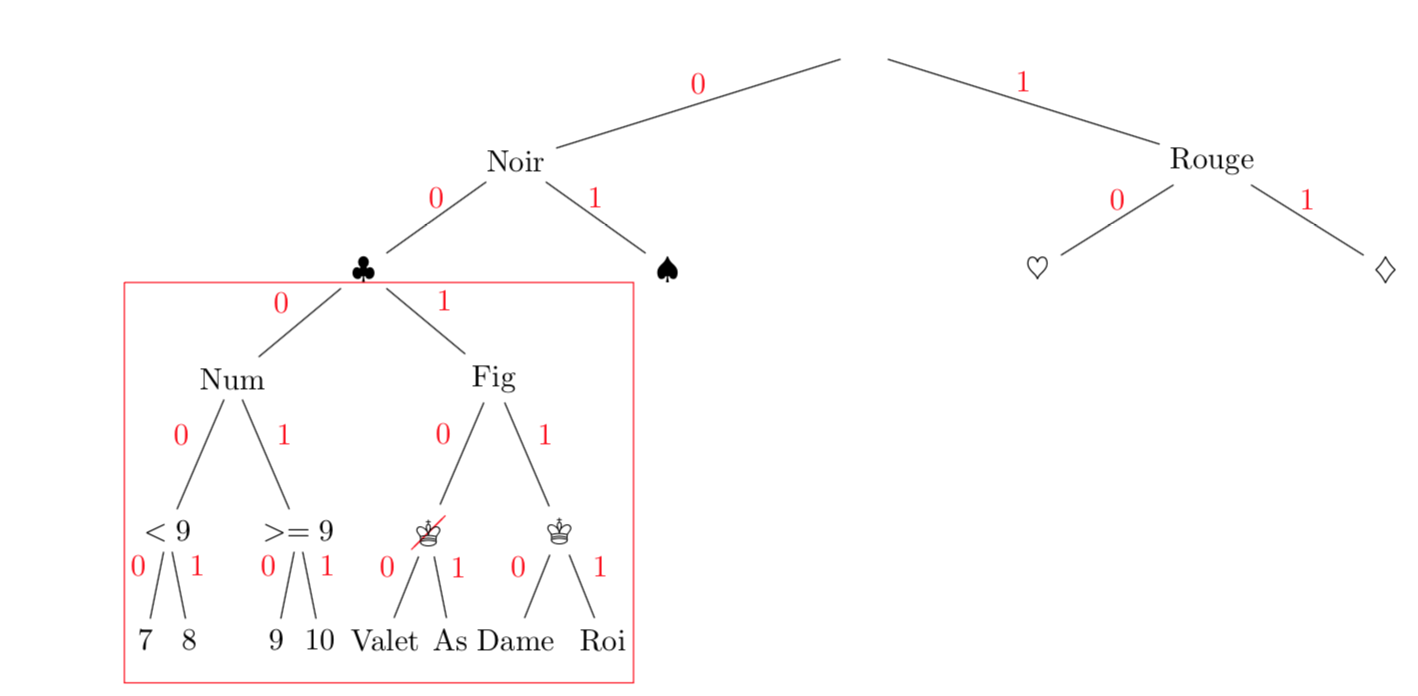

Cette représentation permet de représenter n’importe quelle carte par une chaîne de 5 caractères constituée uniquement de 0 ou de 1. Autrement dit, cet arbre sert à coder une carte ou à la décoder.
* exemple de codage : le 10 de trèfle se code par ≪00011≫.
* exemple de décodage : ≪00101≫ représente l’As de Trèfle ; ≪10110≫ représente la Dame de Coeur.

1. Comment coder le 8 de cœur ?


In [ ]:
"10001"

2. Un joueur a dans ses mains 5 cartes dont voici le code : ≪ 00001 01010 10000 01110 11101 ≫. Quel est son jeu ?

In [ ]:
"8 de trèfle, 9 de pique, 7 de coeur, Dame de pique et As de carreau"

3. En utilisant la classe `arbreBinaire` vue dans le TP https://capytale2.ac-paris.fr/web/c-auth/list?returnto=/web/code/46f7-258160, coder l’arbre `A` ci-dessus, les valeurs des différents nœuds de l’arbre étant des chaînes de caractères. 

Ainsi, pour on écrira en toutes lettres les symboles utilisés dans l’arbre :
`'Trèfle'` au lieu de ♣, `'Pique'` au lieu de ♠, `'Coeur'` au lieu de ♥, `'Carreau'` au lieu de ♦,
`'Tete'`dans le cas d'une Reine ou d'un Roi et `'NonTete'` dans le cas d'un Valet ou d'un As.

In [8]:
class ArbreBinaire :
    def __init__(self,r,g,d):
        '''constructeur'''
        self.racine = r 
        self.gauche = g
        self.droit = d
    
    def __str__(self):
        '''affiche l’arbre comme une chaîne de caractères de la forme racine(gauche,
        droit)'''
        return str(self.racine) + '('+str(self.gauche) + ',' + str(self.droit) + ')'

AF1=ArbreBinaire('7',None,None)
AF2=ArbreBinaire('8',None,None) 
AF3=ArbreBinaire('9',None,None) 
AF4=ArbreBinaire('10',None,None) 
AF5=ArbreBinaire('Valet',None,None) 
AF6=ArbreBinaire('As',None,None) 
AF7=ArbreBinaire('Dame',None,None) 
AF8=ArbreBinaire('Roi',None,None)
AE1=ArbreBinaire('<9',AF1,AF2) 
AE2=ArbreBinaire('>=9',AF3,AF4) 
AE3=ArbreBinaire('NonTete',AF5,AF6) 
AE4=ArbreBinaire('Tete',AF7,AF8)
AD1=ArbreBinaire('Num',AE1,AE2)
AD2=ArbreBinaire("Fig",AE3,AE4)
AC1=ArbreBinaire("Trèfle",AD1,AD2) 
AC2=ArbreBinaire('Pique',AD1,AD2) 
AC3=ArbreBinaire("Coeur",AD1,AD2) 
AC4=ArbreBinaire('Carreau',AD1,AD2)
AB1=ArbreBinaire('Noir',AC1,AC2) 
AB2=ArbreBinaire('Rouge',AC3,AC4)

A=ArbreBinaire('',AB1,AB2)


4. Ecrire une fonction `decodage` prenant en paramètre un arbre A et une chaîne de cinq caractères constituée de 0
et 1 et qui affiche la carte associée à cette chaîne de caractères dans l’arbre.

Par exemple, l’appel `decodage(A,'00101')` devra renvoyer la chaîne de caractères `'As de Trèfle'`.

Indications :
* il sera nécessaire de copier l’arbre en paramètre dans un arbre auxiliaire afin que les modifications à l’intérieur de la fonction n’altèrent pas l’arbre initial (on peut en avoir besoin après).
* on pourra utiliser une liste dans laquelle on stockera les valeurs des différents nœuds rencontrés au fil du décodage.


In [6]:
def decodage(A,c):
    arbre = A
    liste_noeuds = []
    for code in c:
        if code == "0":
            arbre = arbre.gauche
        else:
            arbre = arbre.droit
        liste_noeuds.append(arbre.racine)
    return liste_noeuds[4] + " de " + liste_noeuds[1]
            
            
        
decodage(A,'00101')   

'As de Trèfle'

5. Ecrire une fonction `codage` prenant en paramètre un arbre `A` et une carte `c` sous forme d’une liste de 5 chaînes de caractères de la forme `[couleur, Symbole, Num ou Fig, <9 ou >=9 ou NonTete ou Tete, Valeur]`) et renvoyant le codage de la carte.

Par exemple, l’appel `codage(A,['Noir','Pique','Num','>=9','10'])` devra renvoyer la chaîne de caractères `01011`.

In [10]:
def codage(A,c):
    arbre = A
    code = ""
    for car in c:
        if car == arbre.gauche.racine:
            code += '0'
            arbre = arbre.gauche
        else : 
            code += '1'
            arbre = arbre.droit
    return code
            
codage(A,['Noir','Pique','Num','>=9','10'])   

'01011'

Remarque. On retrouve ce principe de codage de le codage de Huffman qui est une méthode de compression de donnés sans perte. Pour en apprendre davantage à ce sujet : https://fr.wikipedia.org/wiki/Codage_de_Huffman